#  Straight Waveguide

In [1]:
import meep as mp
print(mp.__version__)
import meep.adjoint as mpa
import numpy as np
from autograd import numpy as npa
from matplotlib import pyplot as plt
from IPython.display import Video

1.27.0


In [2]:
seed = 240
np.random.seed(seed)
mp.verbosity(0)
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.44)

waveguide_width = 0.5 # (μm)

arm_separation = waveguide_width+0.05#3 # (μm) distance between arms center to center
waveguide_length = 3 # (μm)
pml_size = 1.0 # (μm)
resolution = 50 # (pixels/μm)

In [3]:
Sx = 2*pml_size + waveguide_length +1 # cell size in X
Sy = 2*pml_size + 2*waveguide_width + arm_separation+ 1 # cell size in Y

cell_size = mp.Vector3(Sx,Sy)

pml_layers = [mp.PML(pml_size)]


geometry = [
    mp.Block(center=mp.Vector3( y=arm_separation/2), material=Si, size=mp.Vector3(Sx, waveguide_width, 0)), # top left waveguide
    #mp.Block(center=mp.Vector3( y=-arm_separation/2), material=Si, size=mp.Vector3(Sx, waveguide_width, 0)), # bottom left waveguide

]



In [4]:
fcen = 1/1.55
width = 0.2
fwidth = width * fcen


source_size    = mp.Vector3(0,waveguide_width+0.1,0)#mp.Vector3(0,2,0)
kpoint = mp.Vector3(1,0,0)


source_center1  = [-Sx/2 + pml_size +0.5,arm_separation/2,0]
source_center2  = [-Sx/2 + pml_size + waveguide_length/3,-arm_separation/2,0]

src_cw = mp.ContinuousSource(frequency=1 / 1.55, fwidth=fwidth)
sources_cw = [
    mp.EigenModeSource(
        src_cw,
        eig_band=1,
        direction=mp.NO_DIRECTION,
        eig_kpoint=kpoint,
        size=source_size,
        center=source_center1,
        amplitude=1.0
    )#,
    # mp.EigenModeSource(
    #     src_cw,
    #     eig_band=1,
    #     direction=mp.NO_DIRECTION,
    #     eig_kpoint=kpoint,
    #     size=source_size,
    #     center=source_center2,
    #     amplitude=-1.0
    # )

]


src_g = mp.GaussianSource(frequency=fcen,fwidth=fwidth)
sources_g = [mp.EigenModeSource(src_g,
                    eig_band = 1,
                    direction=mp.NO_DIRECTION,
                    eig_kpoint=kpoint,
                    size = source_size,
                    center=source_center1,
                    amplitude=1.0),
            mp.EigenModeSource(
                    src_g,
                    eig_band=1,
                    direction=mp.NO_DIRECTION,
                    eig_kpoint=kpoint,
                    size=source_size,
                    center=source_center2,
                    amplitude=0.0 - 1.0j
    )]

In [5]:
sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources_cw,
                    #symmetries=[mp.Mirror(direction=mp.Y)],
                    default_material=SiO2,
                    resolution=resolution)

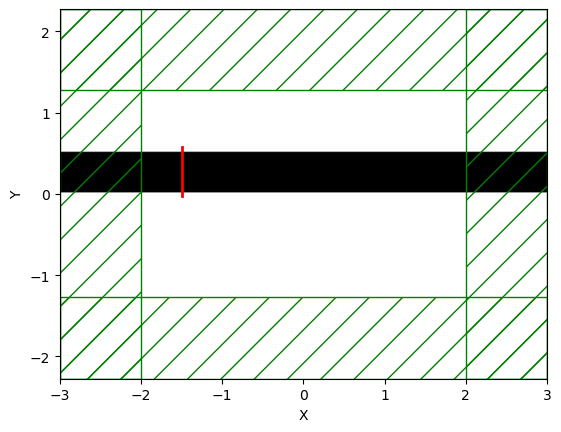

In [6]:
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [7]:
sim.run(until=150)


FloatProgress(value=0.0, description='0% done ', max=150.0)

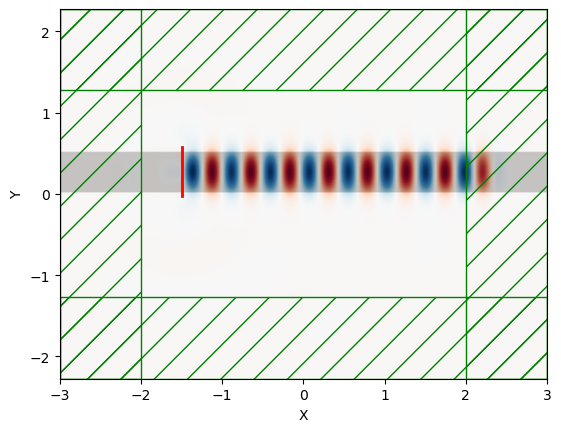

In [8]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [9]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez, realtime=False, normalize=True)
plt.close()

<Figure size 640x480 with 0 Axes>

In [10]:
sim.run(mp.at_every(1, Animate), until=150)
plt.close()

FloatProgress(value=0.0, description='0% done ', max=150.0)

In [11]:
filename = "straignt_waveguides.mp4"
Animate.to_mp4(10, filename)

In [12]:
Video(filename)


## Reference images

With amplitude = 1.0 + 0.0j

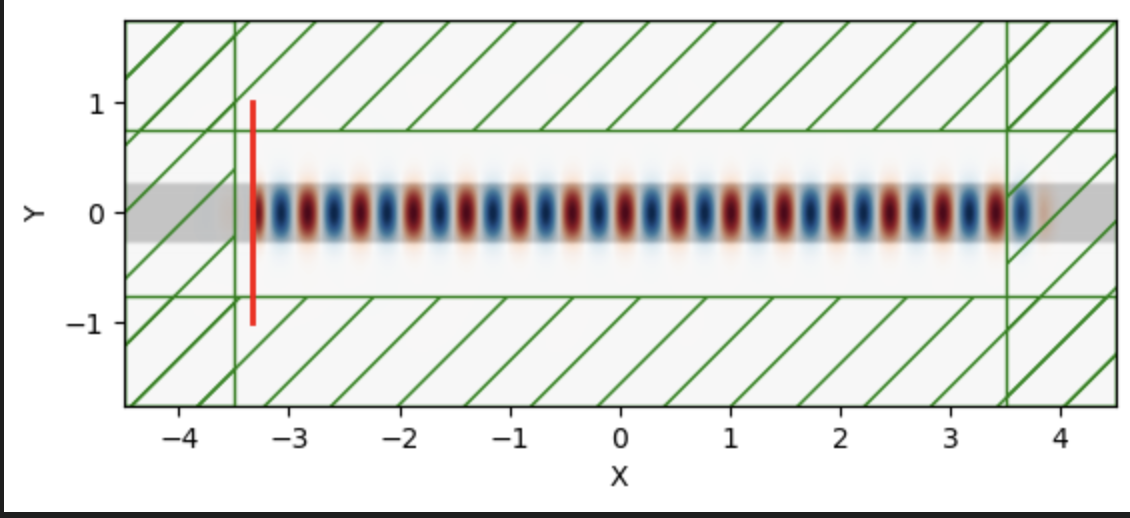

With amplitude= -1.0 + 0.0j

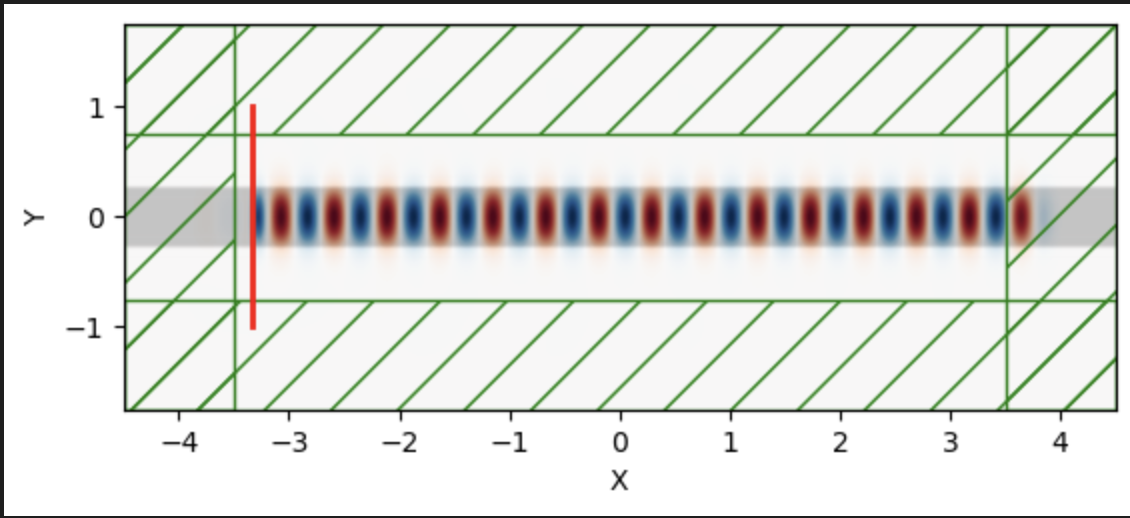

With amplitude= 0.0 + 1.0j

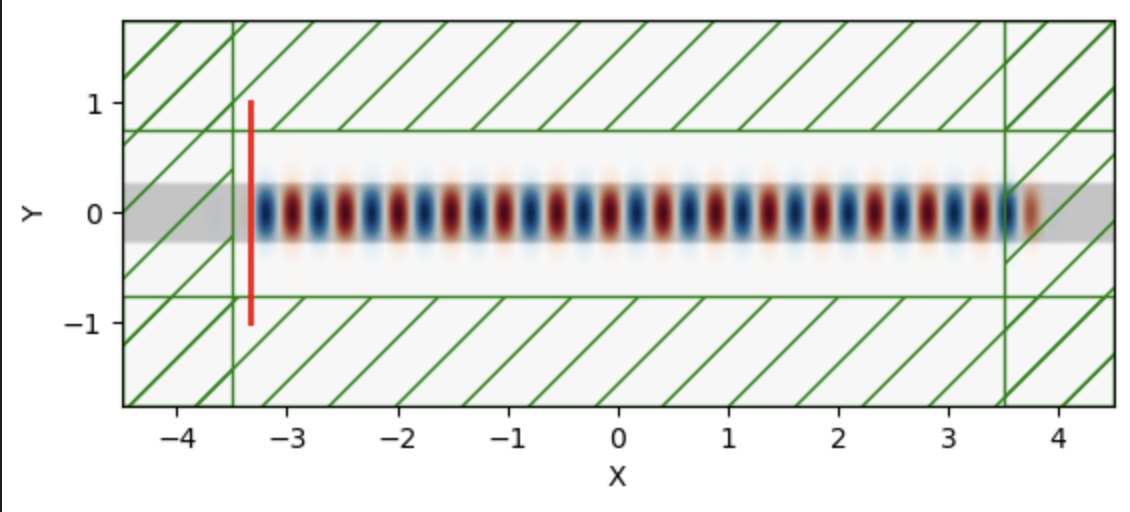

With amplitude= 0.0 - 1.0j

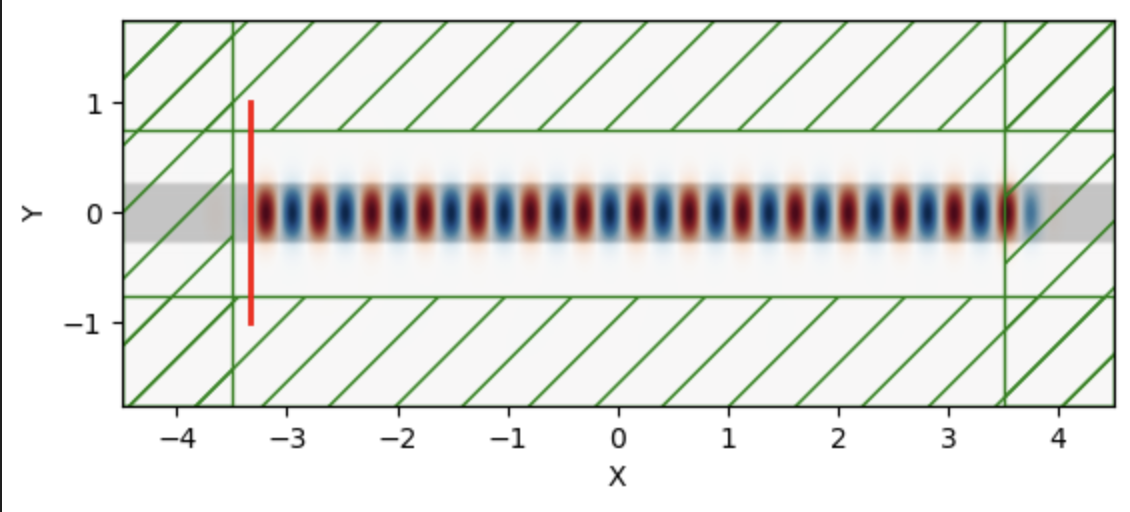